In [1]:
#basics
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

# extra plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
from matplotlib.transforms import Bbox
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from util import get_elev

from dirs import projdir, datadir, asodatadir
from caldordata import watershed, caldormeta_gdf, sfa_stream, sfa_watershed, usa, caldor, cdec, wlabels2, usgs_loc, tahoe, srtmlocal
from caldordata import modis_SCF, mtbs_rdnbr

plt.style.use('/Users/cowherd/Documents/mplstyles/marianne.mplstyle')

/Users/cowherd/Documents/caldor-snow/scripts/caldordata.py:33: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  caldormeta = gpd.GeoDataFrame(caldormeta, crs = 'EPSG:4326')
Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


In [17]:
cdec

,Name,Acronym,Latitude,Longitude,Elevation [ft],Year,Agency,geometry
0,Lake Audrain,ABN,38.81983,-120.039320,7300,1941.0,USFS,POINT (-120.03932 38.81983)
1,Philipps,PHL,38.81800,-120.027000,6800,1941.0,DWR,POINT (-120.02700 38.81800)
2,Caples Lake*,CAP,38.71079,-120.041580,8000,1939.0,DWR,POINT (-120.04158 38.71079)
3,Tamarack Flat,TMF,38.80300,-120.103000,6550,1939.0,DWR,POINT (-120.10300 38.80300)
4,Alpha*,ALP,38.80414,-120.215640,7600,1965.0,DWR,POINT (-120.21564 38.80414)
5,Echo Summit,ECS,38.82852,-120.038980,7450,1940.0,USFS,POINT (-120.03898 38.82852)
6,Forni Ridge*,FRN,38.80397,-120.215919,7600,NaN,USBR,POINT (-120.21592 38.80397)


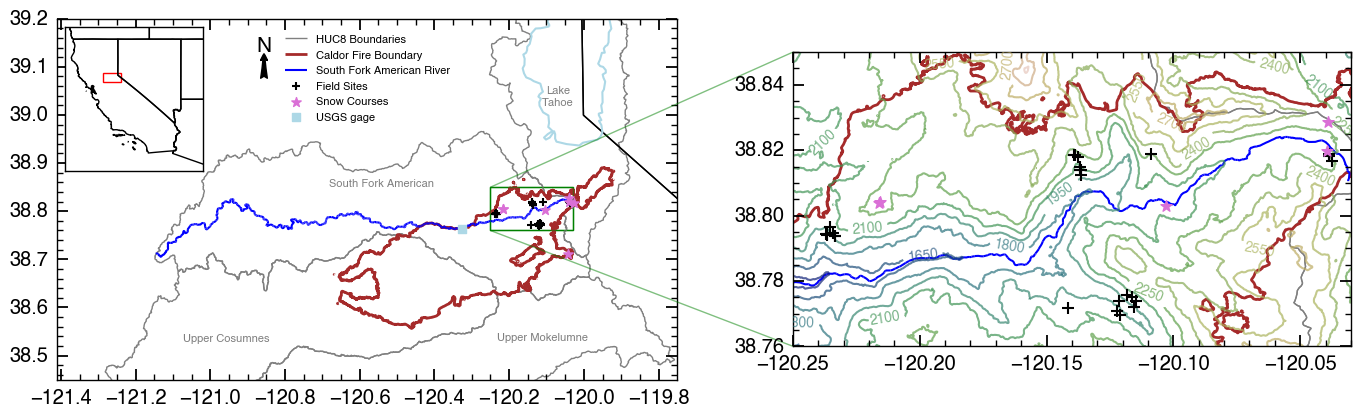

In [2]:

fig, ax = plt.subplots()
# main axis background
ax_inset2 = inset_axes(ax, width="90%", height="90%", loc='right', bbox_to_anchor=(1.1, 0, 1, 1), bbox_transform=ax.transAxes)

sizes = [[35,50,30], [70,70,70]]
for i,myax in enumerate([ax, ax_inset2]):
    ms = sizes[i]
    watershed.boundary.plot(ax=myax, color='gray', linewidth=1, label = 'HUC8 Boundaries')
    caldor.boundary.plot(ax=myax, color='brown', linewidth=2, label = 'Caldor Fire Boundary')
    sfa_stream.plot(ax=myax, color='blue', alpha=1, label = 'South Fork American River')
    usa.boundary.plot(ax=myax, color='black', linewidth=1)

    # main axis plot
    caldormeta_gdf.plot(ax=myax, color='black', alpha=1, markersize=ms[0], marker='+', zorder=5, label = 'Field Sites')
    cdec.plot(ax=myax, color='orchid', markersize=ms[1], marker='*', zorder=5, alpha=1, label = 'Snow Courses')
    usgs_loc.plot(ax=myax, color = 'lightblue', markersize = ms[2], marker = 's', zorder = 5, alpha = 1, label = 'USGS gage')
    tahoe.boundary.plot(ax = myax, color = 'lightblue')
x0, x1, y0, y1 = -121.41, -119.75, 38.45, 39.20

ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)

# Add inset axes
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper left', bbox_to_anchor = (-0.09,0,1,1), bbox_transform=ax.transAxes)
usa.boundary.plot(ax=ax_inset, color='black', linewidth=1)
ax_inset.set_xlim(-125, -112)
ax_inset.set_ylim(31, 43)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xticklabels([])
ax_inset.set_yticklabels([])

width, height = x1 - x0, y1 - y0
ax_inset.add_patch(patches.Rectangle((x0, y0), width, height, fill=False, edgecolor='red', linewidth=1))

ax.legend(frameon=False, loc='upper center', fontsize=8)

inset_x0, inset_x1, inset_y0, inset_y1 = -120.25, -120.03, 38.76, 38.85
ax_inset2.set_xlim(inset_x0, inset_x1)
ax_inset2.set_ylim(inset_y0, inset_y1)
clipped_data = srtmlocal.sel(lon=slice(inset_x0, inset_x1), lat=slice(inset_y0, inset_y1))

CS = ax_inset2.contour(clipped_data.lon, clipped_data.lat, clipped_data, cmap='gist_earth', alpha = 0.7, levels = 10)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)


rect = patches.Rectangle((inset_x0, inset_y0), inset_x1 - inset_x0, inset_y1 - inset_y0, linewidth=1, edgecolor='green', facecolor='none')
a,b = ax.indicate_inset_zoom(ax_inset2, edgecolor="green")

ax.add_patch(rect)

for entry in wlabels2.itertuples():
    ax.text(entry.x, entry.y, entry.name, fontsize=8, ha='center', style = 'italic', color = 'gray')

## add a north arrow

py =0.61 * ax.figure.bbox.height
px =0.33 * ax.figure.bbox.width
ax.annotate("N", xy=(px, py), fontsize=15, xycoords="figure pixels", ha = "center")
ax.annotate("",  xy=(px,  py), xytext=(px, py-30),xycoords="figure pixels",
        arrowprops=dict(arrowstyle="fancy", facecolor="black"))
  
fig.savefig(f'{projdir}/figures/map.jpg', dpi=800, bbox_inches='tight')
plt.show()


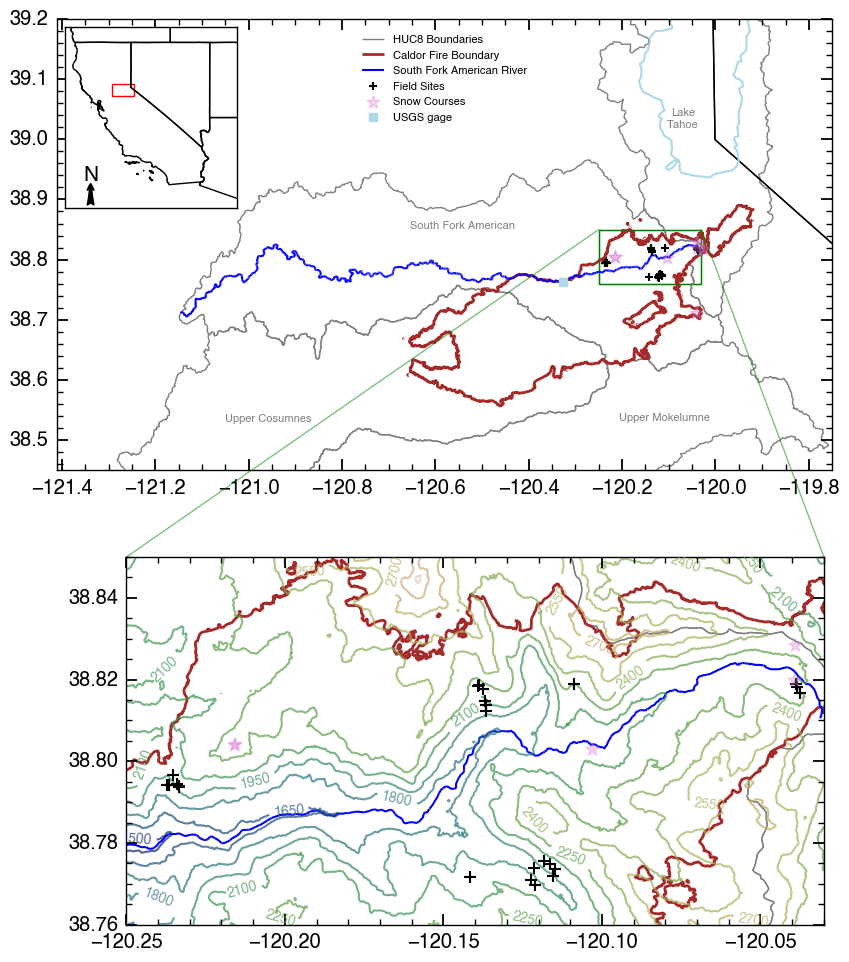

In [18]:

fig, ax = plt.subplots(figsize = (10,15))
# main axis background
ax_inset2 = inset_axes(ax, width="90%", height="90%", loc='right', bbox_to_anchor=(0, -1.1, 1, 1), bbox_transform=ax.transAxes)

sizes = [[35,50,30], [100,100,100]]
for i,myax in enumerate([ax, ax_inset2]):
    ms = sizes[i]
    watershed.boundary.plot(ax=myax, color='gray', linewidth=1, label = 'HUC8 Boundaries')
    caldor.boundary.plot(ax=myax, color='brown', linewidth=2, label = 'Caldor Fire Boundary')
    sfa_stream.plot(ax=myax, color='blue', alpha=1, label = 'South Fork American River')
    usa.boundary.plot(ax=myax, color='black', linewidth=1)

    # main axis plot
    caldormeta_gdf.plot(ax=myax, color='black', alpha=1, markersize=ms[0], marker='+', zorder=5, label = 'Field Sites')
    cdec.plot(ax=myax, color='orchid', markersize=ms[1], marker='*', zorder=5, alpha=0.5, label = 'Snow Courses')
    usgs_loc.plot(ax=myax, color = 'lightblue', markersize = ms[2], marker = 's', zorder = 5, alpha = 1, label = 'USGS gage')
    tahoe.boundary.plot(ax = myax, color = 'lightblue')
x0, x1, y0, y1 = -121.41, -119.75, 38.45, 39.20

ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)

# Add inset axes
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper left', bbox_to_anchor = (-0.09,0,1,1), bbox_transform=ax.transAxes)
usa.boundary.plot(ax=ax_inset, color='black', linewidth=1)
ax_inset.set_xlim(-125, -112)
ax_inset.set_ylim(31, 43)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xticklabels([])
ax_inset.set_yticklabels([])

width, height = x1 - x0, y1 - y0
ax_inset.add_patch(patches.Rectangle((x0, y0), width, height, fill=False, edgecolor='red', linewidth=1))

ax.legend(frameon=False, loc='upper center', fontsize=8)

inset_x0, inset_x1, inset_y0, inset_y1 = -120.25, -120.03, 38.76, 38.85
ax_inset2.set_xlim(inset_x0, inset_x1)
ax_inset2.set_ylim(inset_y0, inset_y1)
clipped_data = srtmlocal.sel(lon=slice(inset_x0, inset_x1), lat=slice(inset_y0, inset_y1))

CS = ax_inset2.contour(clipped_data.lon, clipped_data.lat, clipped_data, cmap='gist_earth', alpha = 0.7, levels = 10)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)


rect = patches.Rectangle((inset_x0, inset_y0), inset_x1 - inset_x0, inset_y1 - inset_y0, linewidth=1, edgecolor='green', facecolor='none')
a,b = ax.indicate_inset_zoom(ax_inset2, edgecolor="green")

ax.add_patch(rect)

for entry in wlabels2.itertuples():
    ax.text(entry.x, entry.y, entry.name, fontsize=8, ha='center', style = 'italic', color = 'gray')

## add a north arrow

py =0.15
px =0.15
ax_inset.annotate("N", xy=(px, py), fontsize=15, xycoords="axes fraction", ha = "center")
ax_inset.annotate("",  xy=(px,  py), xytext=(px, py-0.15),xycoords="axes fraction",
        arrowprops=dict(arrowstyle="fancy", facecolor="black"))
  
fig.savefig(f'{projdir}/figures/map.jpg', dpi=800, bbox_inches='tight')
plt.show()


780.0

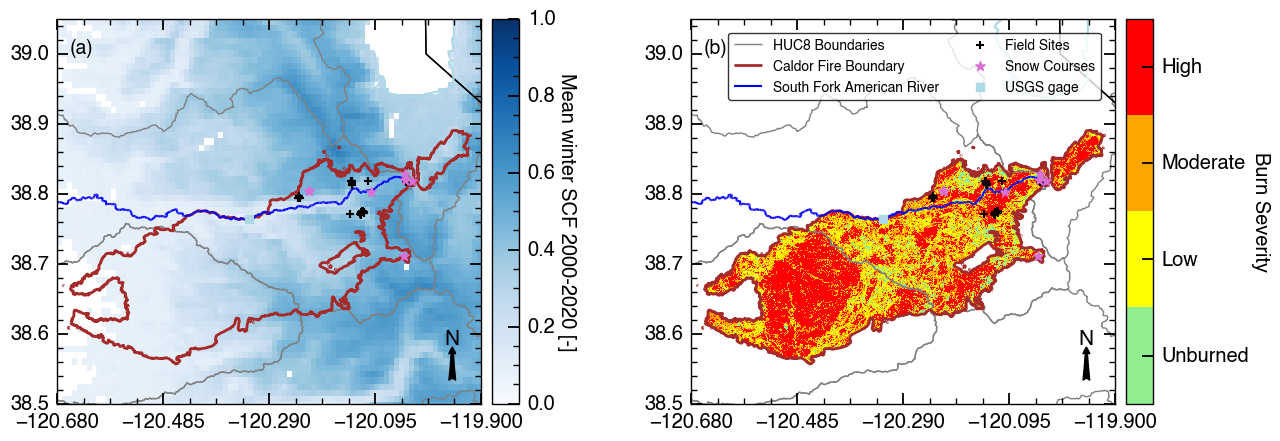

In [3]:


colors = ['lightgreen','yellow','orange','red']
categories = ['Unburned', 'Low', 'Moderate', 'High']
cmap = mcolors.ListedColormap(colors)
bounds = [-200, 69, 315, 640, 5000] ## miller and thode burn severity categoires
norm = mcolors.BoundaryNorm(bounds, cmap.N)

mtbs_clip = mtbs_rdnbr.rio.clip(caldor.geometry)

fig, axs = plt.subplots(1,2, figsize = (15,5), sharex = True)
x0, x1, y0, y1 = -120.68, -119.9, 38.5, 39.05

for i, ax in enumerate(axs):  
    # main axis background
    watershed.boundary.plot(ax=ax, color='gray', linewidth=1, label = 'HUC8 Boundaries')
    caldor.boundary.plot(ax=ax, color='brown', linewidth=2, label = 'Caldor Fire Boundary')
    sfa_stream.plot(ax=ax, color='blue', alpha=1, label = 'South Fork American River')
    usa.boundary.plot(ax=ax, color='black', linewidth=1)
    # main axis plot
    caldormeta_gdf.geometry.plot(ax=ax, color='black', alpha=1, markersize=40, marker='+', zorder=5, label = 'Field Sites')
    cdec.plot(ax=ax, color='orchid', markersize=50, marker='*', zorder=5, alpha=1, label = 'Snow Courses')
    usgs_loc.plot(ax=ax, color = 'lightblue', markersize = 30, marker = 's', zorder = 5, alpha = 1, label = 'USGS gage')
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    tahoe.boundary.plot(color = 'lightblue', ax = ax)
    
    ax.text(0.03,0.95, f'({chr(97+i)})', transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
    
    ax.set_xticks(np.linspace(x0, x1, 5))
    
    py = 0.2 * ax.get_position().height
    px = 3.3 * ax.get_position().width
    ax.annotate("N", xy=(px, py), fontsize=15, xycoords="axes fraction", ha = "center")
    ax.annotate("",  xy=(px,  py), xytext=(px, py-.1),xycoords="axes fraction",
                arrowprops=dict(arrowstyle="fancy", facecolor="black"))

    
ax = axs[0]
cb = ax.pcolormesh(modis_SCF.x, modis_SCF.y, modis_SCF.median(dim='time'), cmap='Blues', alpha=1, zorder=1, vmin =0, vmax = 1)
# plt.colorbar(cb, ax=ax, label = 'Snow Covered Fraction', fraction = 0.3)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.5)
cbar = plt.colorbar(cb, cax=cax)
cbar.ax.set_ylabel('Mean winter SCF 2000-2020 [-]', rotation=270, labelpad = 15)
#ax.legend(loc = 'lower center', frameon = False, fontsize = 13, ncol = 6, bbox_to_anchor=(1.25, -0.25))
handles, labels  = ax.get_legend_handles_labels()
ax = axs[1]
cb = ax.pcolormesh(mtbs_clip.x, mtbs_clip.y, mtbs_clip.band_data[0],cmap=cmap, norm=norm, alpha = 1)
midbounds = [0.5 * (bounds[i] + bounds[i+1]) for i in range(len(bounds)-1)]
# cbar = plt.colorbar(cb, ax=ax, ticks = midbounds, label = 'Burn Severity')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-.5)
cbar = plt.colorbar(cb, cax = cax) 
ax.legend(handles, labels, loc = 'upper right', frameon = True, fontsize = 10, ncol = 2) # , bbox_to_anchor=(1.25, -0.25))

# cbar.ax.set_yticks([])
cbar.ax.set_yticks(midbounds)
cbar.ax.minorticks_off()
cbar.ax.set_yticklabels(categories)
cbar.ax.set_ylabel('Burn Severity', rotation=270, labelpad = 15)
plt.savefig(f'{projdir}/figures/snowfiremaps.jpg', dpi=800, bbox_inches='tight')
plt.show()
